Post simulation checks

# Import modules
import numpy as np
import zarr
import allel   
#idk why but my allel doesnt seem to load?? even though ive definitely installed it as scikit-allel
import scipy.cluster.hierarchy as sch
import scipy.spatial
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal
from scipy.ndimage import gaussian_filter1d
from numpy.lib.stride_tricks import sliding_window_view
from tqdm import tqdm
import dask
from dask.delayed import delayed
from dask.base import compute
from itertools import combinations
import time
import seaborn as sns
import sys
import tskit

1. import in vcf/ tree file to examine population size


In [40]:
# checking .tree outputs
import tskit
#tskit.load(file="C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/burnin_no.19_early.trees")
tree = tskit.load(file="C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/burnin_no.19_complete.trees")
print(tree)
tree.max_root_time()

# install pyslim !!! issue here involving msprime? pyslim cannot be imported/downloaded
#import pyslim

# read into pyslim and calculate nucleotide diversity and compare against expected nucleotide diversity (theta)
# check that it exceeds 10% and not more than 20%


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001FB80857EE0>>
Traceback (most recent call last):
  File "C:\Users\Cheyanne\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/burnin_no.19_complete.trees'

2. Plot nucleotide diversity for all simulations.
- red flag if nucleotide diversity smaller than 10% or greater than 20%
- a. confidence intervals!
- make vector or csv with nucleotide diversity metric

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys 

#parameters = pd.read_csv('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/Estimating-effective-population-size-from-resistance-loci/simulations/parameter_combinations.csv')
#print(parameters)
#how to loop through and calculate for each combination?
seed = 1811758731

def plot_burnin(seed):
    '''
    This function plots the heterozygosity from all burnin logfiles.csv
    
    Arguments:
        array_index : combination number of this simulation (1-27)
        seed: seed number of simulation
        
    Returns:
        figure: plot of heterozygosity against tick with baseline and upperlimit for reference
        

    ''' 
    #plot size etc
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True

    # read in csv of parameter combinations and nucleotide diversity
    parameters = pd.read_csv('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/Estimating-effective-population-size-from-resistance-loci/simulations/parameter_combinations.csv')
    
    for array_index in range(1, 28): 
        print(array_index)
        index = array_index - 1

        #parameters
        N = parameters.iloc[index]['N']
        mu = parameters.iloc[index]['Mutation Rate']
        r = parameters.iloc[index]['Recombination Rate']

        #baseline and upperlimit
        baseline = parameters.iloc[index]['baseline']
        theta = 4* N * mu
        pi = theta/ (1 + 2 * theta)
        H = theta/(1+theta)
        #upperlimit = parameters.iloc[index]['upperlimit']
        print("baseline:" + str(baseline))
        #print("upperlimit:"+ str(upperlimit))

        subtitle = "N= "+ str(N)+", mu= "+ str(mu)+ ", r= " + str(r) + ", θ= " + str(theta)
        title = "Combination: " + str (array_index)

        #seeds
        # read in logfile.csv (interval=100ticks) 
        logfile_path = "burnin" + str(array_index) +"_logfile.csv"
        df = pd.read_csv(logfile_path)
        print(df) #debug point

        # plot 
        figure = plt.figure(array_index)
        plt.plot('cycle','Heterozygosity', data = df, figure=figure)
        plt.axhline(y=baseline, color='r', linestyle='-', figure=figure, ls='--', label='π+10%' ) #10% of nucleotide diversity for reference
        plt.axhline(y=H, color='r', linestyle='-', figure=figure, label='$H_O$') # heterozygosity that fits better than pi
        #plt.axhline(y=pi, color='m', linestyle='-', figure=figure, label='π')
        plt.xlabel('Generation', figure=figure)
        plt.ylabel('Nucleotide Diversity', figure=figure)
        plt.suptitle(title, figure=figure, fontsize =18)
        plt.title(subtitle, fontsize=14)
        plt.legend() # shows the axhline labels
        
        plt.show()
    return figure


1
baseline:0.091666667
    cycle  Heterozygosity
0       1        0.000499
1     101        0.038045
2     201        0.060149
3     301        0.072500
4     401        0.081562
5     501        0.085722
6     601        0.089579
7     701        0.088863
8     801        0.091146
9     901        0.089053
10   1001        0.090564


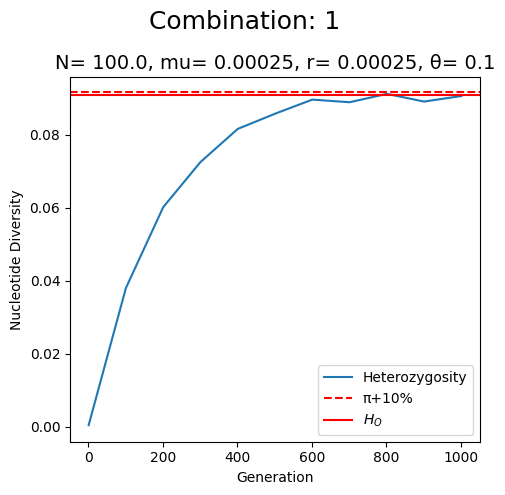

2
baseline:0.091666667
    cycle  Heterozygosity
0       1        0.000493
1     101        0.039184
2     201        0.061650
3     301        0.073832
4     401        0.081560
5     501        0.084081
6     601        0.087317
7     701        0.086430
8     801        0.090250
9     901        0.089945
10   1001        0.088627
11   1101        0.089003
12   1201        0.091135
13   1301        0.091276
14   1401        0.090187
15   1501        0.090462
16   1601        0.089764
17   1701        0.090600
18   1801        0.090690
19   1901        0.092109


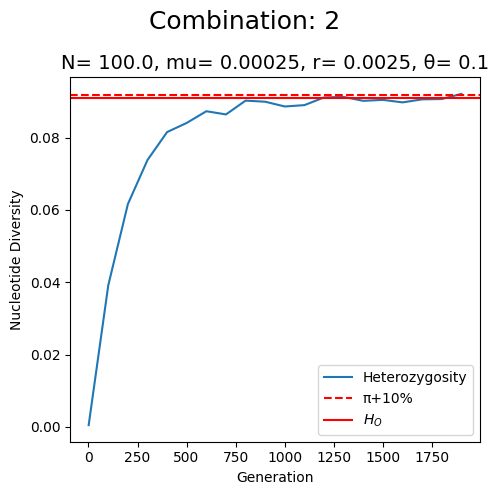

3
baseline:0.091666667
    cycle  Heterozygosity
0       1        0.000519
1     101        0.039480
2     201        0.063037
3     301        0.073335
4     401        0.080128
5     501        0.086463
6     601        0.087073
7     701        0.089354
8     801        0.089940
9     901        0.089971
10   1001        0.090956
11   1101        0.089777
12   1201        0.089736
13   1301        0.091056
14   1401        0.090585
15   1501        0.089262
16   1601        0.091647
17   1701        0.090646
18   1801        0.090830


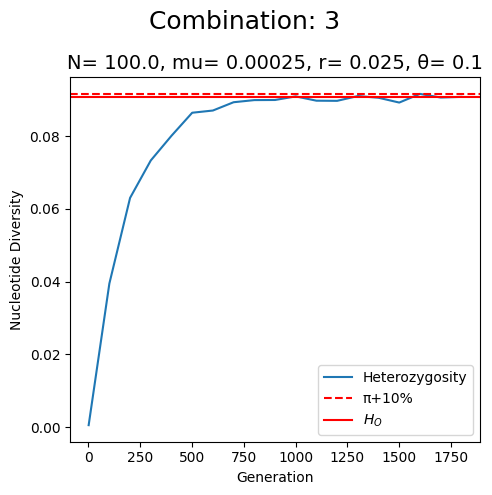

4
baseline:0.366666667
   cycle  Heterozygosity
0      1        0.004992
1    101        0.322321
2    201        0.433410
3    301        0.475636
4    401        0.487162


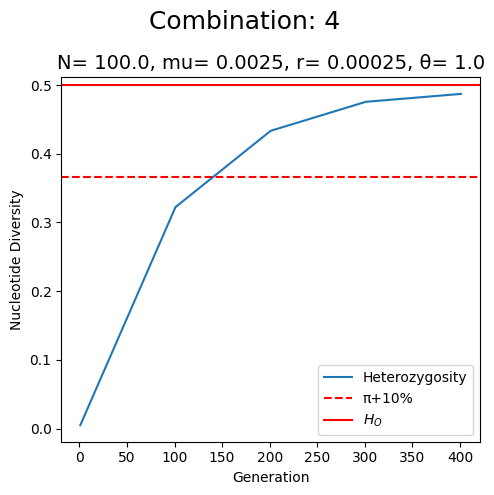

5
baseline:0.366666667
   cycle  Heterozygosity
0      1        0.005008
1    101        0.318786
2    201        0.436159
3    301        0.473607
4    401        0.488425


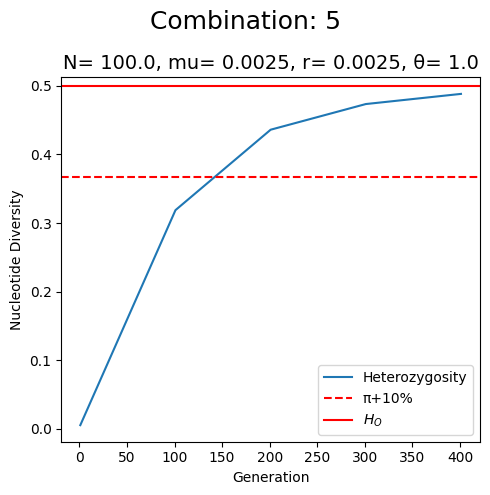

6
baseline:0.366666667
   cycle  Heterozygosity
0      1        0.004972
1    101        0.317126
2    201        0.433575
3    301        0.469379
4    401        0.489560


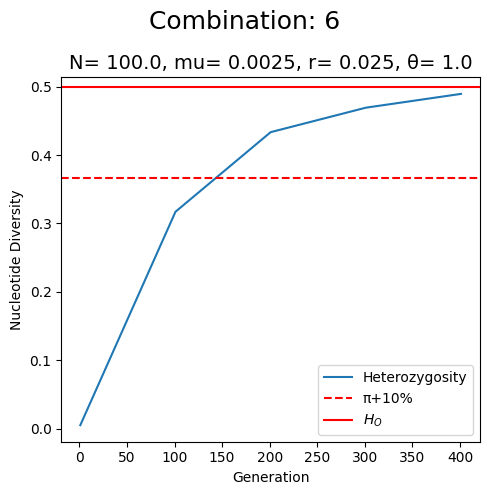

7
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.049338
1    101        0.906612
2    201        0.908815
3    301        0.915594
4    401        0.896719


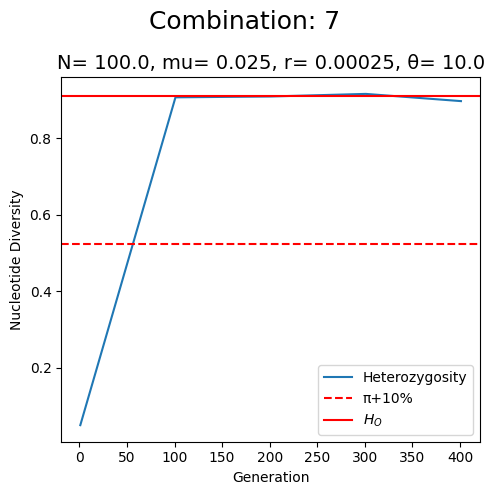

8
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.049377
1    101        0.907736
2    201        0.910610
3    301        0.914110
4    401        0.917655


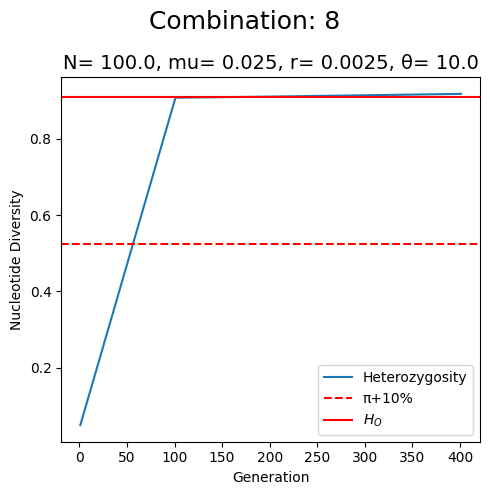

9
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.049384
1    101        0.917284
2    201        0.909120
3    301        0.911918
4    401        0.909903


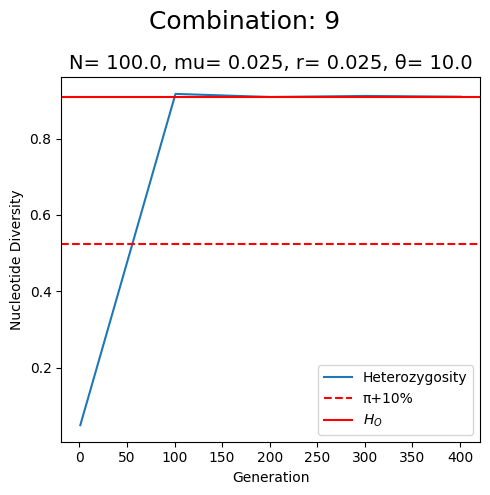

10
baseline:0.091666667
    cycle  Heterozygosity
0       1        0.000050
1     101        0.004999
2     201        0.009713
3     301        0.014043
4     401        0.018214
..    ...             ...
89   8901        0.090966
90   9001        0.091009
91   9101        0.091310
92   9201        0.091655
93   9301        0.091989

[94 rows x 2 columns]


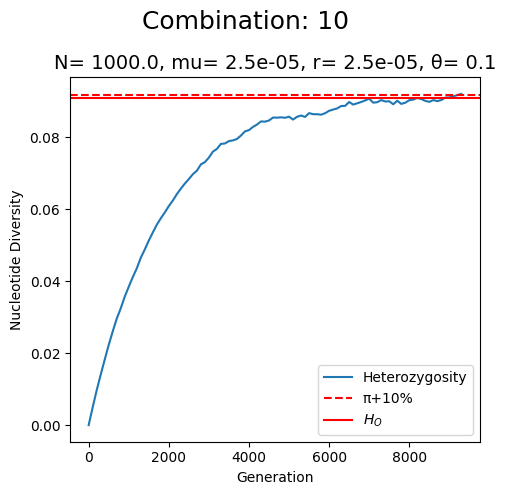

11
baseline:0.091666667
     cycle  Heterozygosity
0        1        0.000049
1      101        0.004907
2      201        0.009522
3      301        0.013854
4      401        0.017816
..     ...             ...
222  22201        0.090725
223  22301        0.091004
224  22401        0.091336
225  22501        0.091607
226  22601        0.091758

[227 rows x 2 columns]


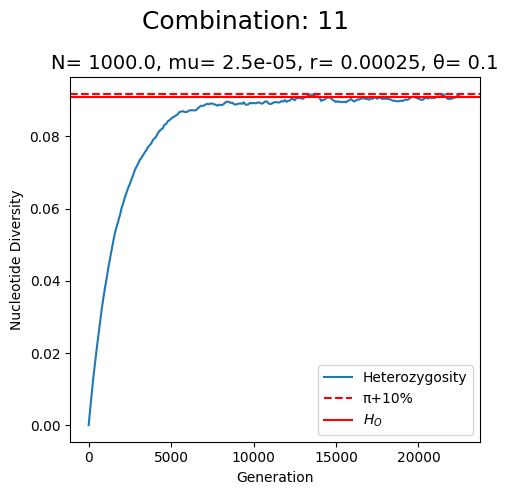

12
baseline:0.091666667
     cycle  Heterozygosity
0        1        0.000051
1      101        0.005027
2      201        0.009607
3      301        0.013893
4      401        0.018190
..     ...             ...
138  13801        0.091063
139  13901        0.090680
140  14001        0.090964
141  14101        0.091325
142  14201        0.091413

[143 rows x 2 columns]


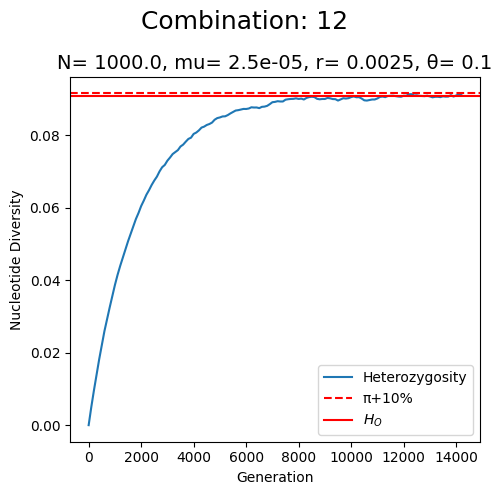

13
baseline:0.366666667
    cycle  Heterozygosity
0       1        0.000501
1     101        0.048025
2     201        0.090887
3     301        0.129411
4     401        0.164327
5     501        0.195720
6     601        0.224978
7     701        0.251282
8     801        0.274807
9     901        0.297230
10   1001        0.316218
11   1101        0.335395
12   1201        0.350695
13   1301        0.363225
14   1401        0.378205
15   1501        0.389001
16   1601        0.399971
17   1701        0.407780
18   1801        0.414973
19   1901        0.425544
20   2001        0.431675
21   2101        0.436595
22   2201        0.440715
23   2301        0.443603
24   2401        0.447731
25   2501        0.455630
26   2601        0.460691
27   2701        0.463635
28   2801        0.466185
29   2901        0.467994
30   3001        0.473595
31   3101        0.473909
32   3201        0.477465
33   3301        0.480129
34   3401        0.482657
35   3501        0.483202
36   3601     

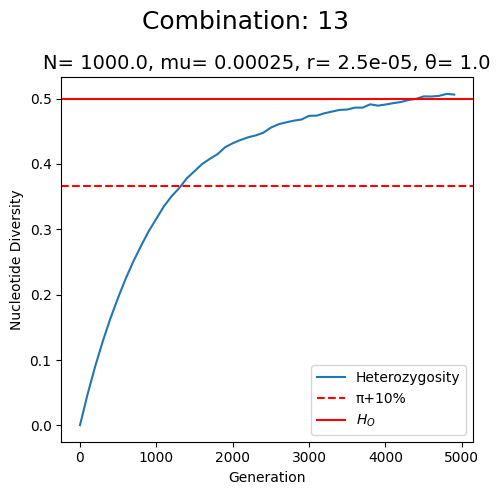

14
baseline:0.366666667
    cycle  Heterozygosity
0       1        0.000500
1     101        0.048271
2     201        0.091158
3     301        0.129855
4     401        0.165483
5     501        0.197753
6     601        0.226499
7     701        0.252060
8     801        0.275184
9     901        0.295441
10   1001        0.315722
11   1101        0.332164
12   1201        0.348700
13   1301        0.362807
14   1401        0.375775
15   1501        0.387755
16   1601        0.398585
17   1701        0.408718
18   1801        0.417200
19   1901        0.425214
20   2001        0.431478
21   2101        0.438234
22   2201        0.445638
23   2301        0.449456
24   2401        0.454582
25   2501        0.458197
26   2601        0.463220
27   2701        0.466975
28   2801        0.469847
29   2901        0.473513
30   3001        0.477039
31   3101        0.478584
32   3201        0.480442
33   3301        0.482601
34   3401        0.482835
35   3501        0.485432
36   3601     

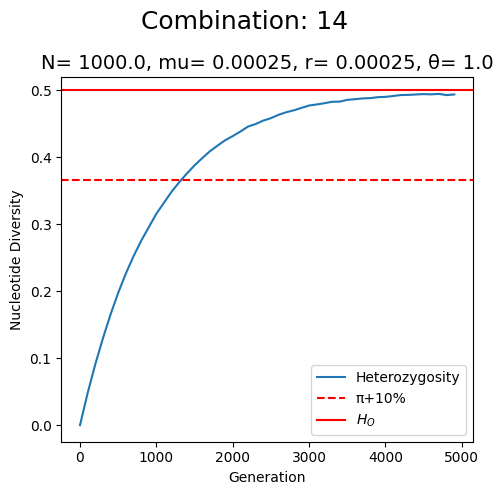

15
baseline:0.366666667
    cycle  Heterozygosity
0       1        0.000499
1     101        0.048139
2     201        0.091355
3     301        0.130094
4     401        0.165709
5     501        0.197157
6     601        0.225774
7     701        0.251895
8     801        0.275988
9     901        0.297553
10   1001        0.316758
11   1101        0.333968
12   1201        0.349894
13   1301        0.363957
14   1401        0.376048
15   1501        0.387973
16   1601        0.398877
17   1701        0.408991
18   1801        0.417118
19   1901        0.425253
20   2001        0.432010
21   2101        0.438081
22   2201        0.444599
23   2301        0.450520
24   2401        0.455042
25   2501        0.459325
26   2601        0.462527
27   2701        0.465808
28   2801        0.469950
29   2901        0.472593
30   3001        0.475396
31   3101        0.477599
32   3201        0.479380
33   3301        0.481430
34   3401        0.483944
35   3501        0.485728
36   3601     

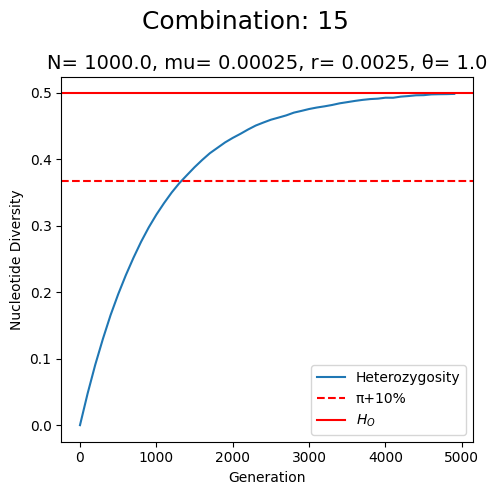

16
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.004995
1    501        0.852961
2   1001        0.903936
3   1501        0.908689
4   2001        0.908116
5   2501        0.908324
6   3001        0.907746
7   3501        0.908342
8   4001        0.911543
9   4501        0.907395


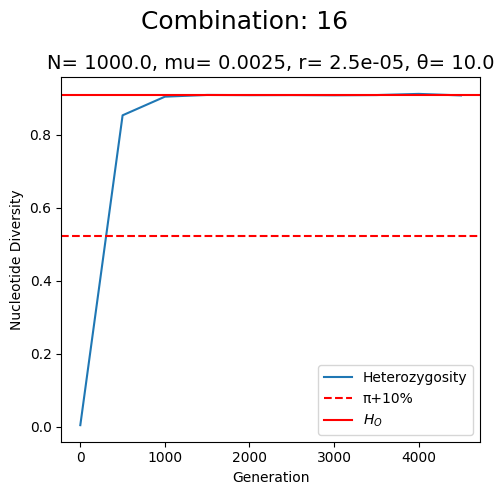

17
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.004991
1    501        0.851020
2   1001        0.905269
3   1501        0.908990
4   2001        0.907821
5   2501        0.908445
6   3001        0.908207
7   3501        0.908841
8   4001        0.909597
9   4501        0.910930


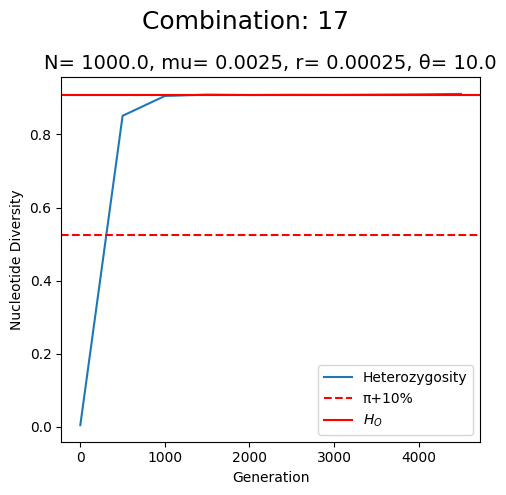

18
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.004996
1    501        0.852568
2   1001        0.906449
3   1501        0.909521


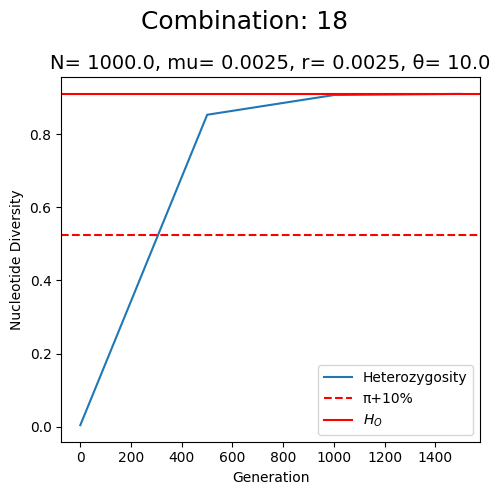

19
baseline:0.091666667
     cycle  Heterozygosity
0        1        0.000005
1      501        0.002444
2     1001        0.004784
3     1501        0.007025
4     2001        0.009228
..     ...             ...
136  68001        0.090182
137  68501        0.090801
138  69001        0.090727
139  69501        0.091062
140  70001        0.091580

[141 rows x 2 columns]


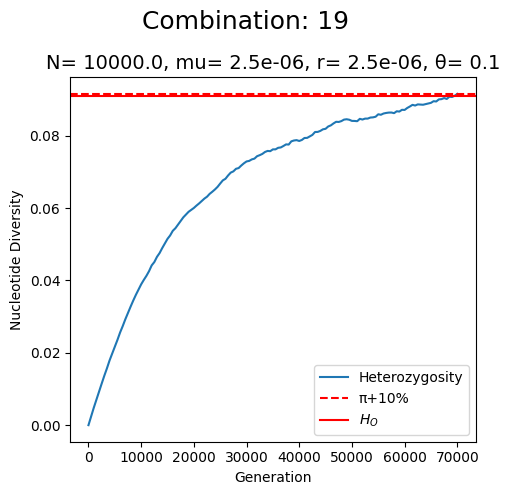

20
baseline:0.091666667
     cycle  Heterozygosity
0        1        0.000005
1      501        0.002484
2     1001        0.004903
3     1501        0.007264
4     2001        0.009534
..     ...             ...
195  97501        0.090874
196  98001        0.090971
197  98501        0.090773
198  99001        0.090718
199  99501        0.090732

[200 rows x 2 columns]


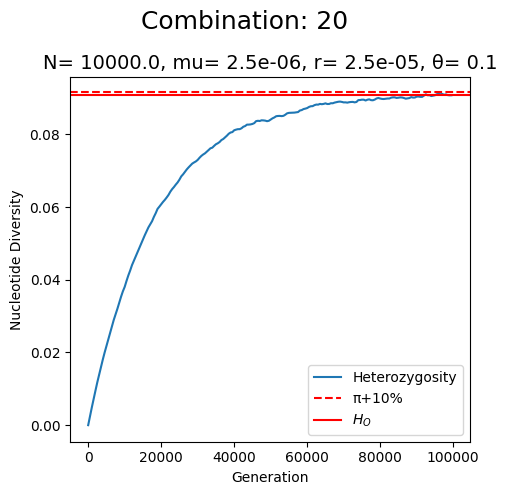

21
baseline:0.091666667
   cycle  Heterozygosity
0      1        0.000005
1    501        0.002513
2   1001        0.004877
3   1501        0.007224
4   2001        0.009445
5   2501        0.011638


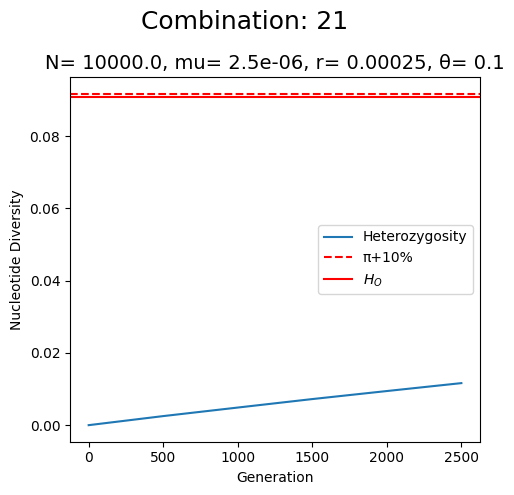

22
baseline:0.366666667
    cycle  Heterozygosity
0       1        0.000050
1     501        0.024384
2    1001        0.047633
3    1501        0.070083
4    2001        0.091039
5    2501        0.110840
6    3001        0.129654
7    3501        0.147963
8    4001        0.164205
9    4501        0.181071
10   5001        0.196786
11   5501        0.211392
12   6001        0.225794
13   6501        0.239019
14   7001        0.251014
15   7501        0.263000
16   8001        0.274831
17   8501        0.285898
18   9001        0.297394
19   9501        0.307813
20  10001        0.317756
21  10501        0.328088
22  11001        0.335857
23  11501        0.343080
24  12001        0.351312
25  12501        0.359600
26  13001        0.364997
27  13501        0.371532
28  14001        0.378249
29  14501        0.383049
30  15001        0.388779
31  15501        0.394368
32  16001        0.398893
33  16501        0.403390
34  17001        0.406558
35  17501        0.411486
36  18001     

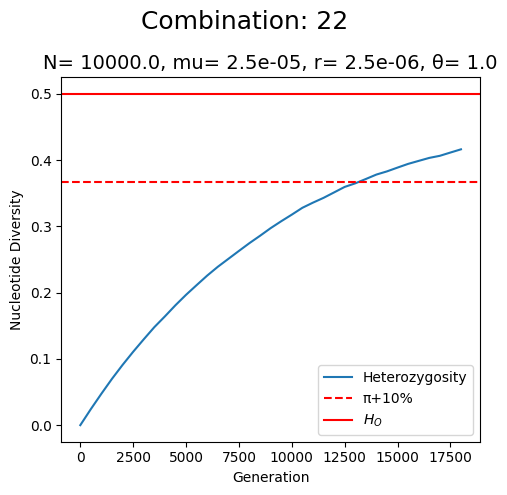

23
baseline:0.366666667
    cycle  Heterozygosity
0       1        0.000050
1     501        0.024489
2    1001        0.047779
3    1501        0.069966
4    2001        0.090647
5    2501        0.110469
6    3001        0.128953
7    3501        0.147228
8    4001        0.164541
9    4501        0.180720
10   5001        0.195965
11   5501        0.211062
12   6001        0.225634
13   6501        0.239063
14   7001        0.251526
15   7501        0.263746
16   8001        0.275012
17   8501        0.285765
18   9001        0.295569
19   9501        0.305531
20  10001        0.315401
21  10501        0.324790
22  11001        0.334444
23  11501        0.341991
24  12001        0.350279
25  12501        0.357555
26  13001        0.364283
27  13501        0.371157
28  14001        0.377457
29  14501        0.383585
30  15001        0.388910
31  15501        0.394511
32  16001        0.399744
33  16501        0.404794
34  17001        0.409261
35  17501        0.414350
36  18001     

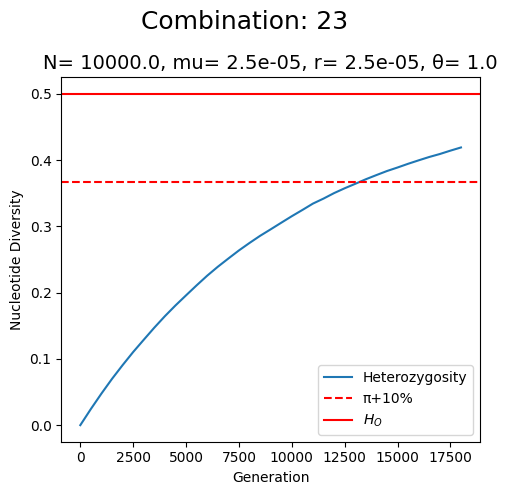

24
baseline:0.366666667
   cycle  Heterozygosity
0      1        0.000050
1    501        0.024477
2   1001        0.047743
3   1501        0.069370
4   2001        0.090411
5   2501        0.110793
6   3001        0.129526
7   3501        0.147357


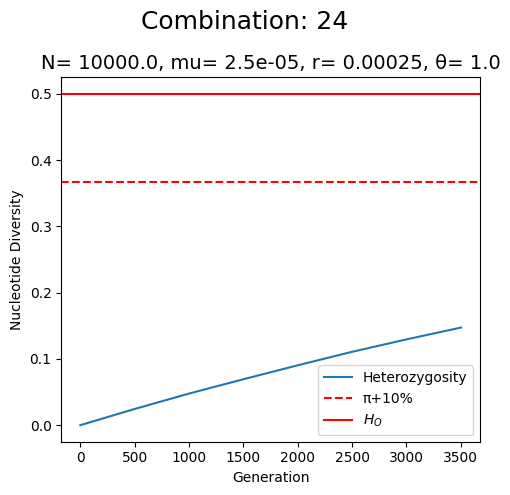

25
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.000499
1    501        0.219045
2   1001        0.385281
3   1501        0.511541
4   2001        0.607391
5   2501        0.679056
6   3001        0.732986
7   3501        0.775270
8   4001        0.806462


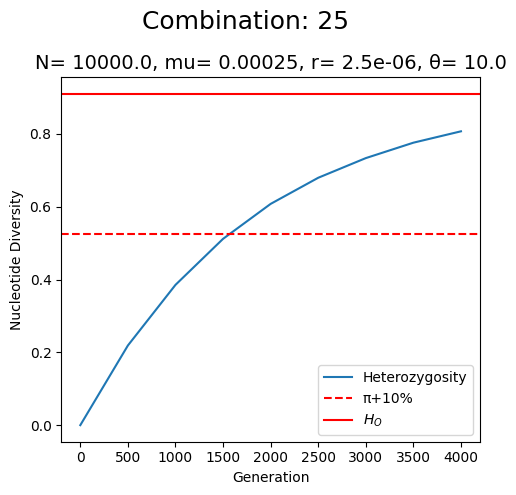

26
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.000500
1    501        0.218801
2   1001        0.384134
3   1501        0.511253
4   2001        0.607488
5   2501        0.680913
6   3001        0.735585
7   3501        0.777115
8   4001        0.808832


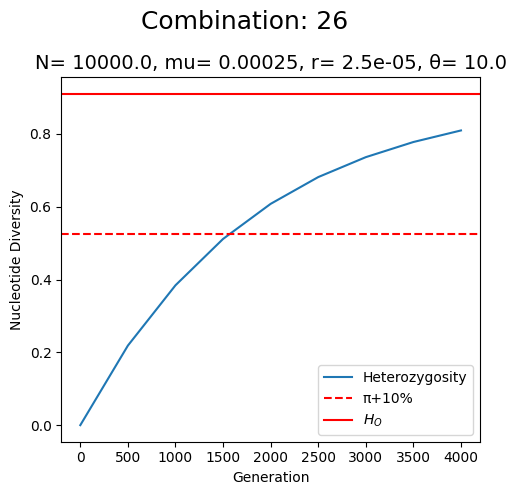

27
baseline:0.523809524
   cycle  Heterozygosity
0      1        0.000500
1    501        0.218858
2   1001        0.385132
3   1501        0.510535
4   2001        0.605819
5   2501        0.678807
6   3001        0.733974


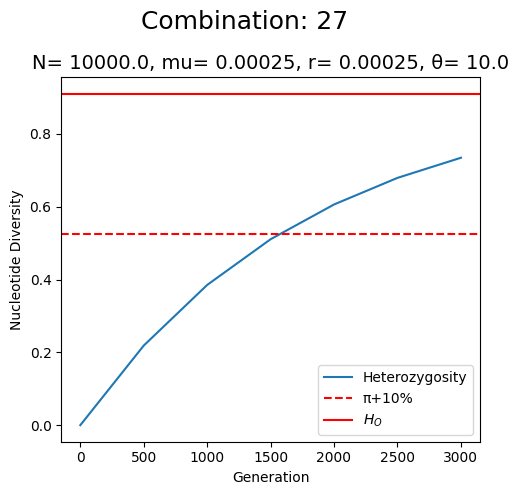

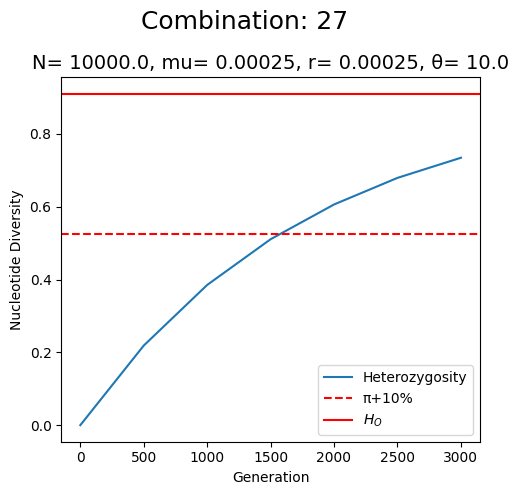

In [106]:
seed = 1811758731
plot_burnin(seed)

Plot nucleotide diversity AND Allele freq over time from the simulation logfiles

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys 

def check_Nuc_Diversity(array_index):
    '''
    This function plots the heterozygosity from each simulation against tick time and prints the number of ticks for checking.
    
    Arguments:
        array_index : combination number of this simulation (1-27)
        seed: seed number of simulation
        
    Returns:
        figure: plot of heterozygosity against tick with baseline and upperlimit for reference
        

    ''' 
    #plot size etc
    plt.rcParams["figure.figsize"] = [15, 5]
    plt.rcParams["figure.autolayout"] = True

    # read in csv of parameter combinations and nucleotide diversity
    parameters = pd.read_csv('C:/CHEYANNE STUFF/ICL Biology/Year 3/Final year project/Estimating-effective-population-size-from-resistance-loci/simulations/parameter_combinations.csv')

    #seeds
    #seeds = [1811758731, 2505954171, 1491780403, 963754032, 786513423, 2964823506, 1099540918, 3416744924, 2064465991, 3746829939]
    #for seed in seeds: 
    
    index = array_index - 1

    
    #baseline and upperlimit
    baseline = parameters.iloc[index]['baseline']
    upperlimit = parameters.iloc[index]['upperlimit']
    #print("baseline:" + str(baseline))
    #print("upperlimit:"+ str(upperlimit))
    #parameters
    N = parameters.iloc[index]['N']
    mu = parameters.iloc[index]['Mutation Rate']
    r = parameters.iloc[index]['Recombination Rate']
    

    # read in logfile.csv (interval=100ticks) 
    logfile_path = str(array_index) + "_" + str(seed) + ".csv"
    df = pd.read_csv(logfile_path)
    print(df) #debug point
    subtitle = "N= "+ str(N)+", mu= "+ str(mu)+ ", r= " + str(r) +", SLiM η= " + str(df.iloc[-1]['No_lineages'])
    title = "combination=" + str(array_index)

    # initial plot to check data is okay using heterozygosity
    #figure = plt.figure()
    #plt.plot('cycle','Heterozygosity', data = df, figure=figure)
    #plt.axhline(y=baseline, color='r', linestyle='-', figure=figure) #10% of nucleotide diversity for reference
    #plt.axhline(y=upperlimit, color='r', linestyle='-', figure=figure) #20% of nuc diversity for reference
    #plt.xlabel('Generation', figure=figure)
    #plt.ylabel('Nucleotide diversity (L)', figure=figure)
    #plt.suptitle(title + ', Nucleotide diversity', figure=figure, fontsize =18)
    #plt.title(subtitle, fontsize=14)
        

    # plot allele freq
    allelefreq_figure = plt.figure()
    plt.plot('cycle','Allele Frequency', data = df, figure=allelefreq_figure)
    plt.xlabel('Generation', figure=allelefreq_figure)
    plt.ylabel('Allele Frequency', figure=allelefreq_figure)
    plt.suptitle(title + ', Allele Frequency', figure=allelefreq_figure, fontsize =22)
    plt.title(subtitle, fontsize=18)

        #plt.show()
    return allelefreq_figure #,figure


baseline:0.091666667
upperlimit:0.1
    Array Index      SeedID  cycle  Allele Frequency  Heterozygosity  \
0             1  1811758731   1100             0.005        0.092500   
1             1  1811758731   1200             0.000        0.092070   
2             1  1811758731   1300             0.060        0.091386   
3             1  1811758731   1400             0.005        0.089630   
4             1  1811758731   1500             0.000        0.092132   
5             1  1811758731   1600             0.000        0.092801   
6             1  1811758731   1700             0.000        0.093507   
7             1  1811758731   1800             0.000        0.092727   
8             1  1811758731   1900             0.020        0.092618   
9             1  1811758731   2000             0.010        0.091651   
10            1  1811758731   2100             0.010        0.090581   
11            1  1811758731   2200             0.260        0.090356   
12            1  1811758731 

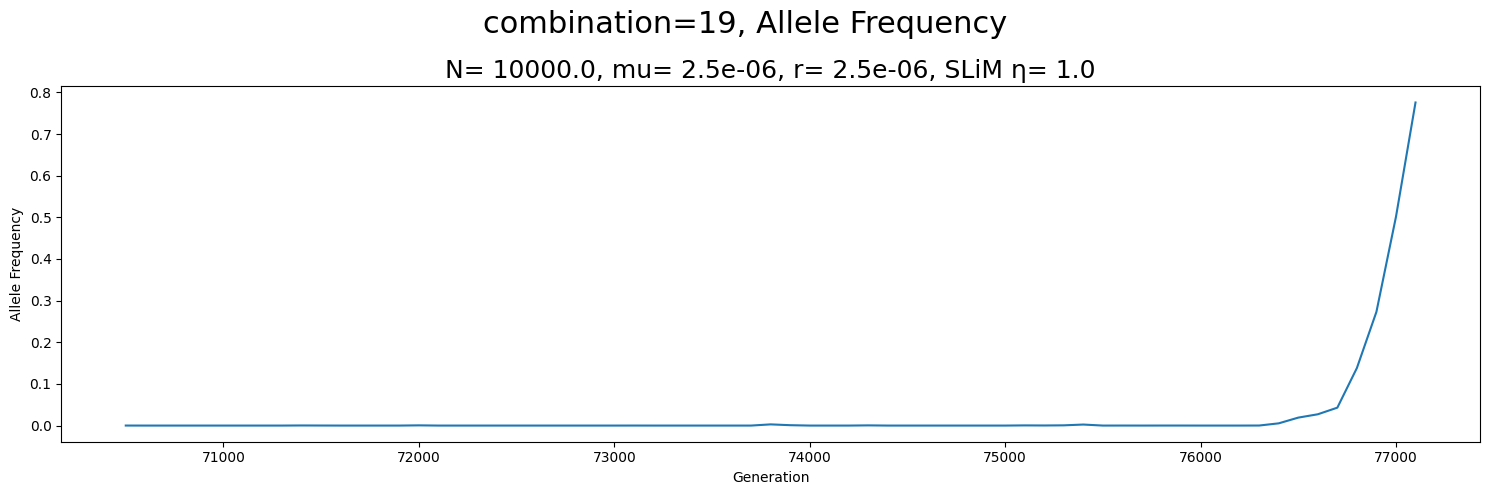

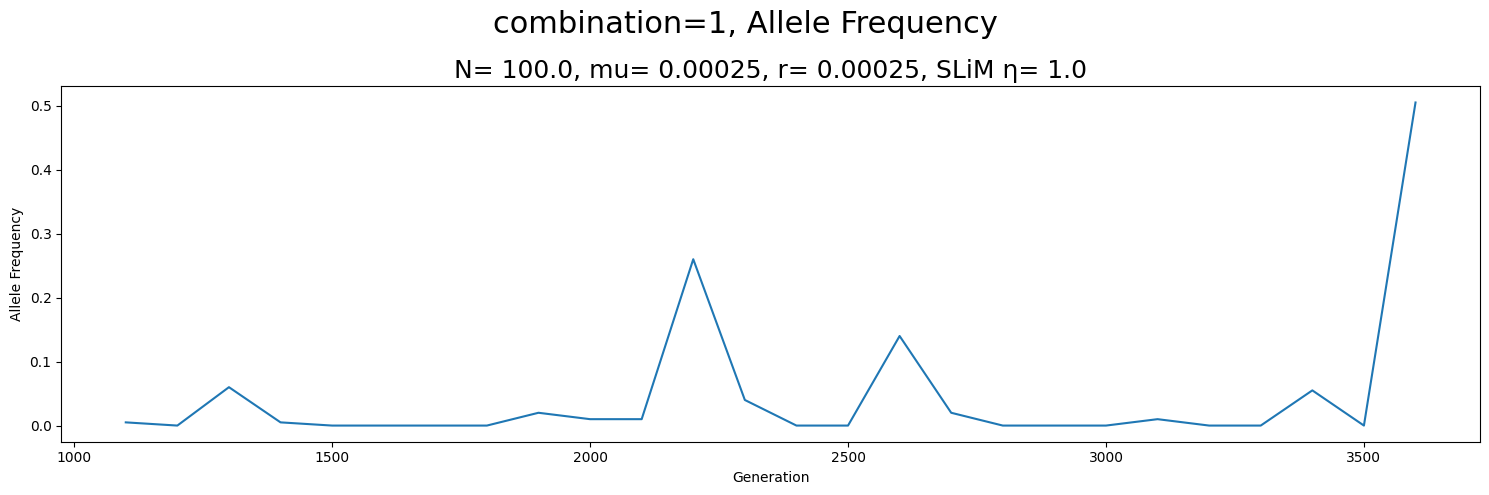

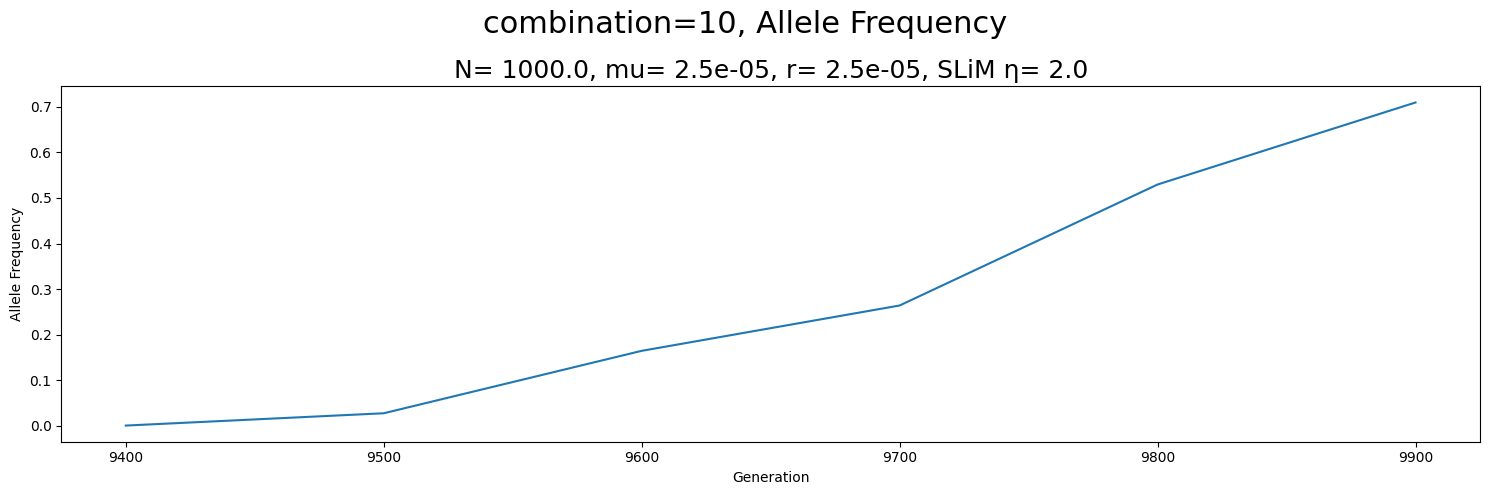

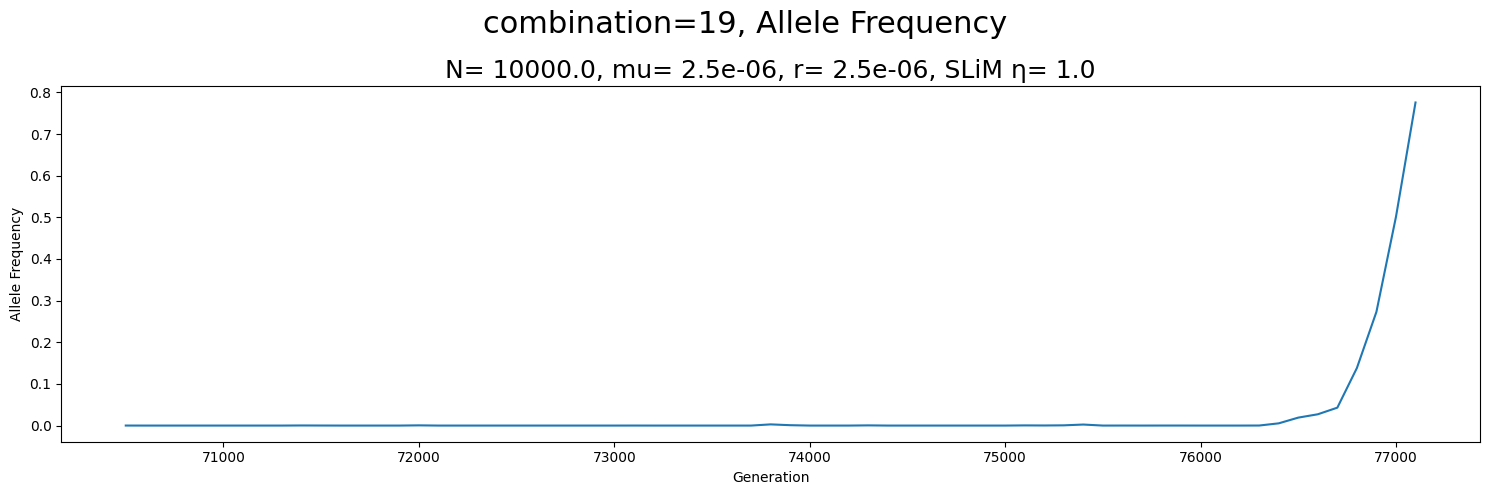

In [104]:
#test function on a simulation logfile
#global array_index 
#array_index = sys.argv[1]

#tested on 24, which is actually a burnin logfile just renamed
# tested on 1 which is a simulation logfile (correct) but terminated after 1 tick (bad)
check_Nuc_Diversity(1)
#check_Nuc_Diversity(5)
#check_Nuc_Diversity(9)
check_Nuc_Diversity(10)
check_Nuc_Diversity(19)
